In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/ky911/Downloads/archive/titanic.csv")

In [3]:
#1 understanding the data

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.shape

(418, 12)

In [6]:
data.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [7]:
# cleaning the data

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
data.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
# Check if 'Age' column exists
if 'Age' in data.columns:
    data['Age'] = data['Age'].fillna(data['Age'].median())
    print("Missing values in 'Age' filled with median.")


Missing values in 'Age' filled with median.


In [16]:
# Check if 'Fare' column exists
if 'Fare' in data.columns:
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())
    print("Missing values in 'Fare' filled with median.")


Missing values in 'Fare' filled with median.


In [17]:
# Check if 'Cabin' column exists
if 'Cabin' in data.columns:
    # Create 'Has_Cabin' feature
    data['Has_Cabin'] = data['Cabin'].apply(lambda x: 0 if pd.isnull(x) else 1)
    
    # Drop the 'Cabin' column if no longer needed
    data.drop('Cabin', axis=1, inplace=True)
    print("'Cabin' processed and dropped.")
else:
    print("'Cabin' column not found.")


'Cabin' column not found.


In [18]:
print(data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Has_Cabin'],
      dtype='object')


In [19]:
# Check if 'Embarked' column exists
if 'Embarked' in data.columns:
    # Fill missing values in 'Embarked' with the most frequent value (mode)
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    print("Missing values in 'Embarked' filled with mode.")


Missing values in 'Embarked' filled with mode.


In [20]:
# Convert 'Sex' and 'Embarked' columns to numeric using one-hot encoding
if 'Sex' in data.columns and 'Embarked' in data.columns:
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
    print("'Sex' and 'Embarked' converted to numerical values.")


'Sex' and 'Embarked' converted to numerical values.


In [21]:
# Verify no more missing values
print("Remaining missing values:\n", data.isnull().sum())


Remaining missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Has_Cabin      0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [22]:
# Save the cleaned dataset to a new CSV file
data.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned data saved to 'cleaned_dataset.csv'.")


Cleaned data saved to 'cleaned_dataset.csv'.


In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Has_Cabin      0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [24]:
# Summary statistics for numerical columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535,0.217703
std,120.810458,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103,0.413179
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875,0.000000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [26]:
import matplotlib.pyplot as plt

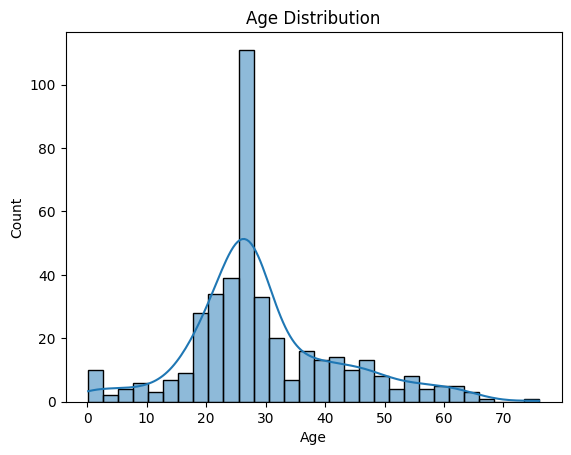

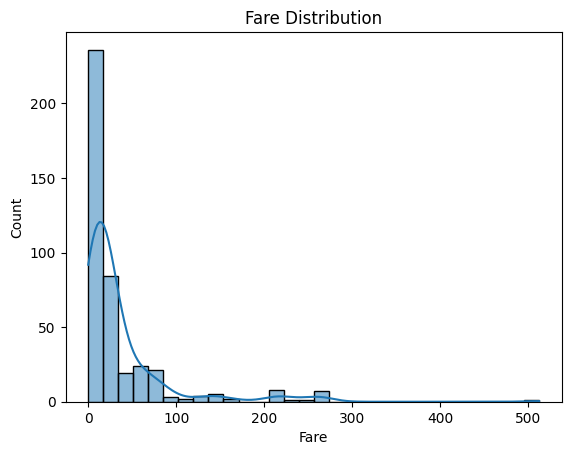

In [27]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing 'Age' distribution
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Visualizing 'Fare' distribution
sns.histplot(data['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

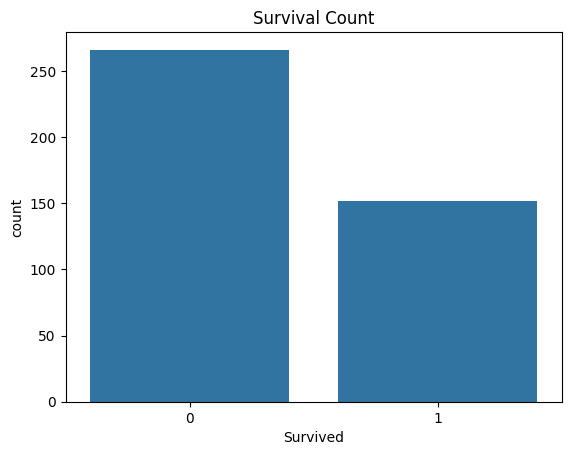

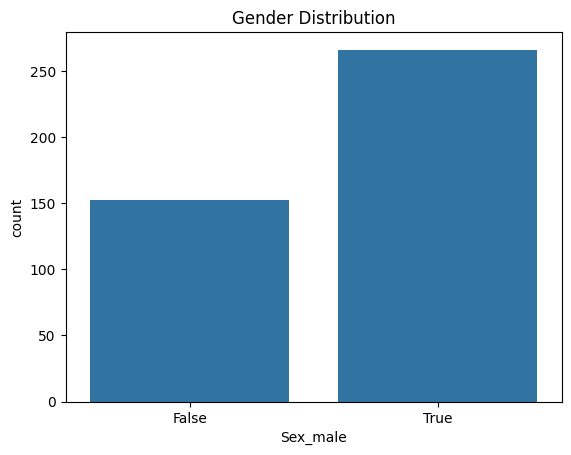

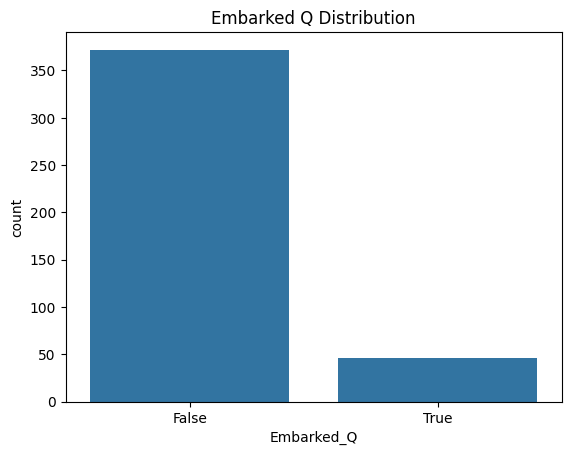

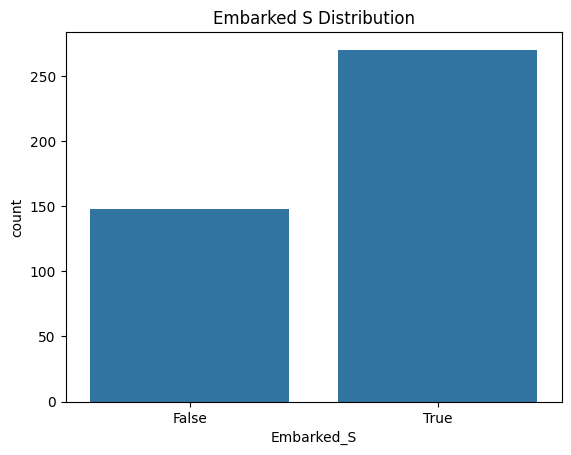

In [28]:
# Visualizing 'Survived' distribution
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

# Visualizing 'Sex_male' distribution
sns.countplot(x='Sex_male', data=data)
plt.title('Gender Distribution')
plt.show()

# Visualizing 'Embarked_Q' distribution
sns.countplot(x='Embarked_Q', data=data)
plt.title('Embarked Q Distribution')
plt.show()

# Visualizing 'Embarked_S' distribution
sns.countplot(x='Embarked_S', data=data)
plt.title('Embarked S Distribution')
plt.show()


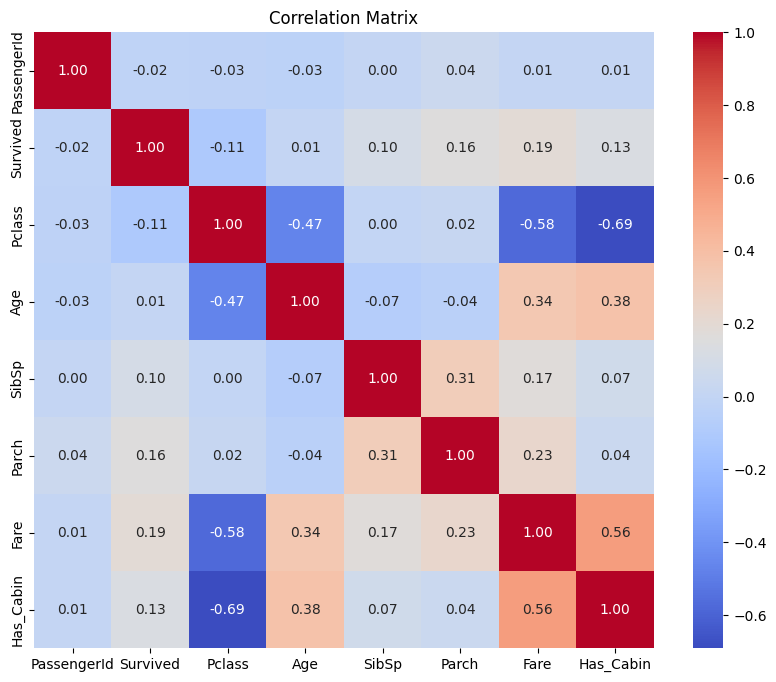

In [30]:
# Selecting only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


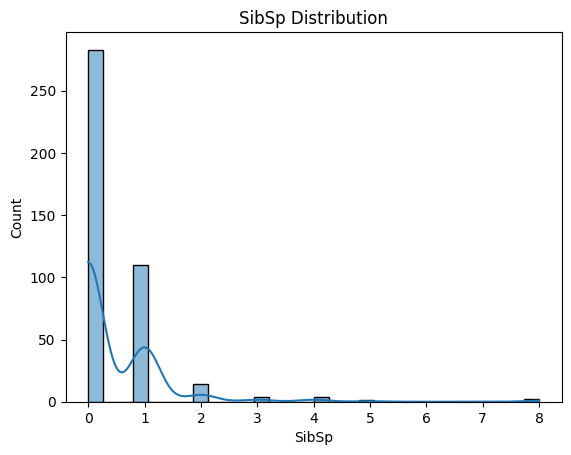

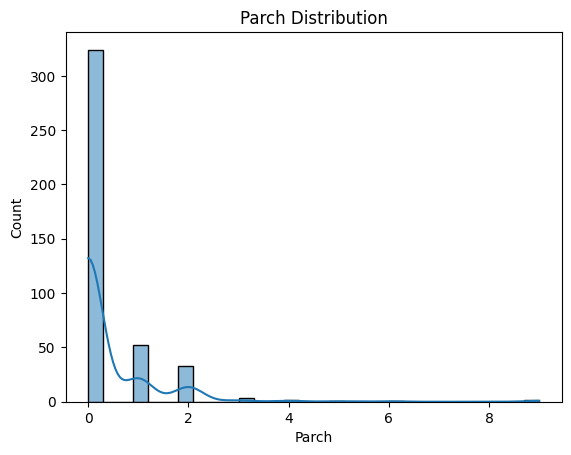

In [31]:
# Visualizing 'SibSp' distribution
sns.histplot(data['SibSp'], kde=True, bins=30)
plt.title('SibSp Distribution')
plt.show()

# Visualizing 'Parch' distribution
sns.histplot(data['Parch'], kde=True, bins=30)
plt.title('Parch Distribution')
plt.show()


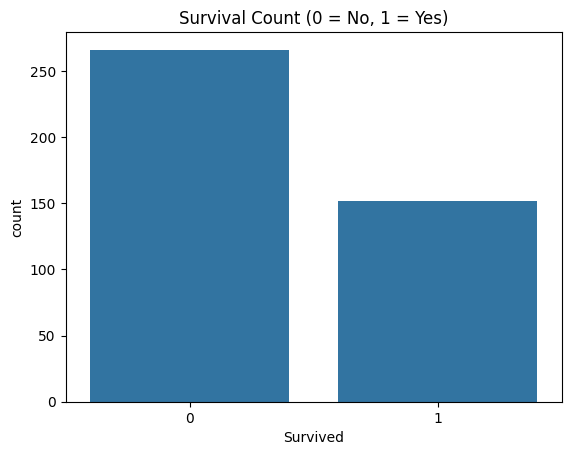

In [33]:
# Visualizing the 'Survived' distribution
sns.countplot(data=data, x='Survived')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

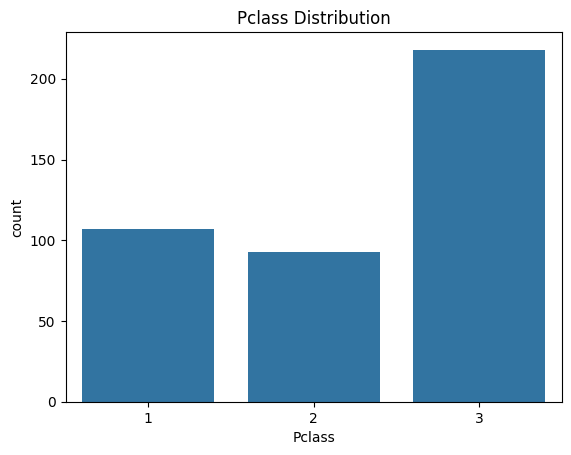

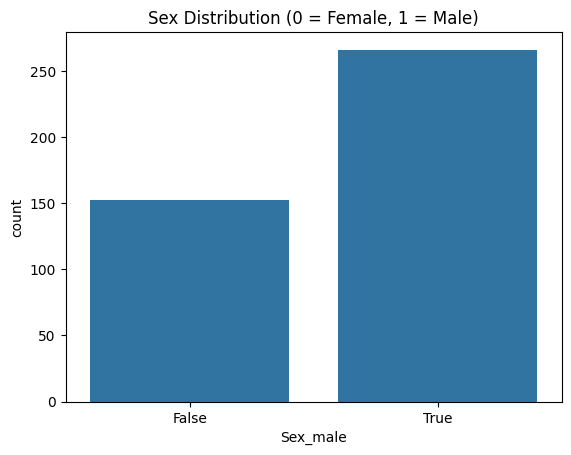

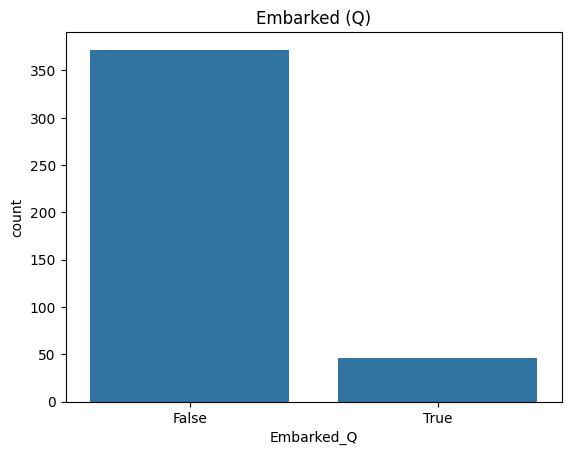

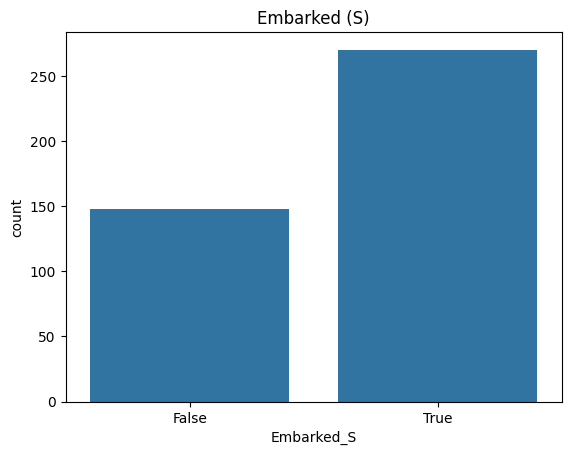

In [35]:
# Visualizing the 'Pclass' distribution
sns.countplot(data=data, x='Pclass')
plt.title('Pclass Distribution')
plt.show()

# Visualizing the 'Sex' distribution
sns.countplot(data=data, x='Sex_male')
plt.title('Sex Distribution (0 = Female, 1 = Male)')
plt.show()

# Visualizing the 'Embarked' distribution
sns.countplot(data=data, x='Embarked_Q')
plt.title('Embarked (Q)')
plt.show()

# Visualizing the 'Embarked' distribution for other categories
sns.countplot(data=data, x='Embarked_S')
plt.title('Embarked (S)')
plt.show()

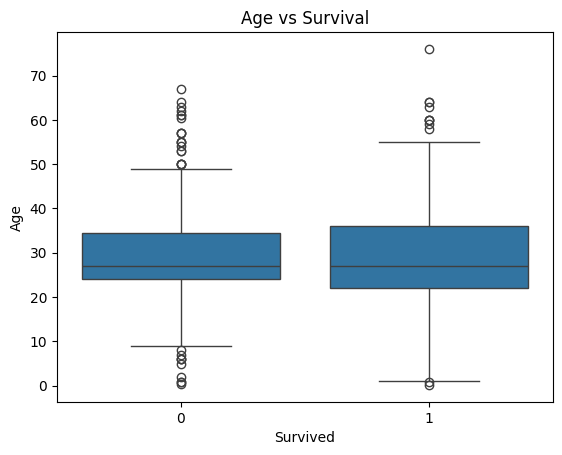

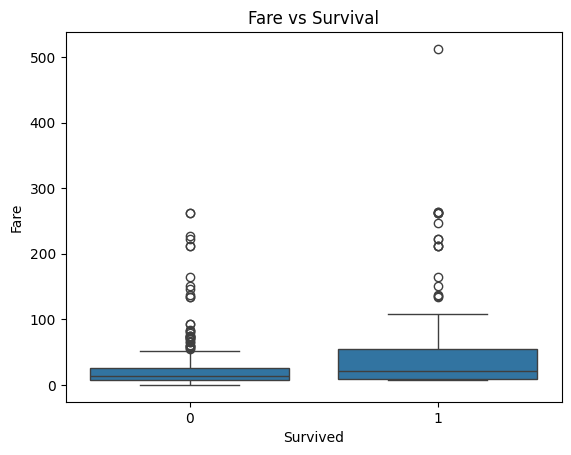

In [37]:
# Age vs Survival
sns.boxplot(data=data, x='Survived', y='Age')
plt.title('Age vs Survival')
plt.show()

# Fare vs Survival
sns.boxplot(data=data, x='Survived', y='Fare')
plt.title('Fare vs Survival')
plt.show()

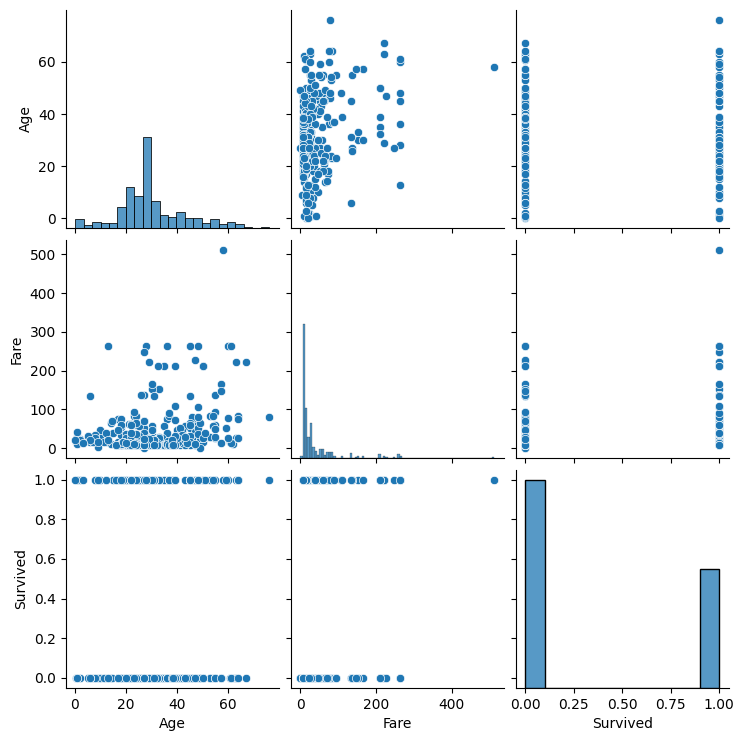

In [38]:
# Pairplot for numerical features, color-coded by 'Survived'
sns.pairplot(data[['Age', 'Fare', 'Survived']])
plt.show()


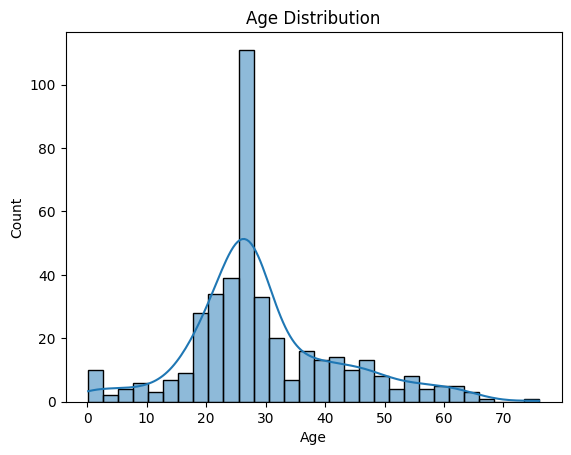

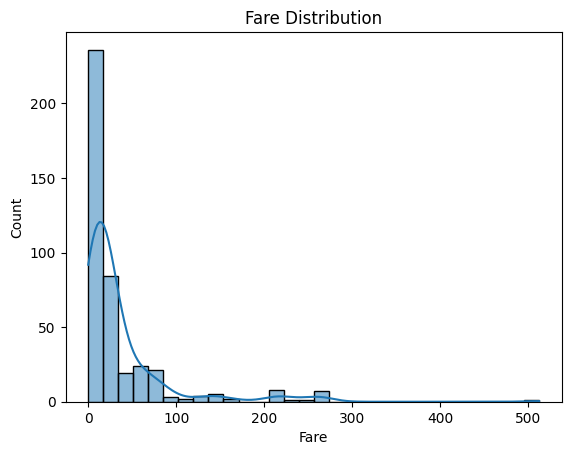

In [39]:
# Age distribution
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Fare distribution
sns.histplot(data['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()
